# Introduction

This notebook compares the test set performance of classifiers using term list scores based on the data-driven, RDoC, and DSM frameworks.

# Load the data

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import sys
sys.path.append("..")
import utilities

## Input parameters

In [2]:
n_iter = 1000 # Number of iterations for bootstrap distributions
frameworks = ["data-driven", "rdoc", "dsm"]
clfs = ["_nn", "", ""]

## Framework contents

In [3]:
lists, circuits = {}, {}
for fw, clf in zip(frameworks, clfs):
    lists[fw], circuits[fw] = utilities.load_framework(fw, suffix=utilities.suffix[fw], clf=clf)

In [4]:
domains = {fw: circuits[fw].columns for fw in frameworks}

## Bootstrap distributions

In [5]:
boot, obs = {}, {}
for fw, clf in zip(frameworks, clfs):
    boot[fw], obs[fw] = {}, {}
    boot[fw] = pd.read_csv("data/arche_boot_{}{}_{}iter.csv".format(fw, clf, n_iter), 
                           index_col=0, header=0)
    obs[fw] = pd.read_csv("data/arche_stat_{}{}.csv".format(fw, clf), 
                           index_col=0, header=0)

# Perform comparison tests

Is the mean of fw<sub>i</sub> greater than the mean of fw<sub>j</sub>?

In [6]:
from statsmodels.stats.multitest import multipletests

In [7]:
p = np.empty((len(frameworks), len(frameworks)))
for i, fw_i in enumerate(frameworks):
    for j, fw_j in enumerate(frameworks):
        boot_i = np.mean(boot[fw_i], axis=0)
        boot_j = np.mean(boot[fw_j], axis=0)
        p[i,j] = np.sum((boot_i - boot_j) <= 0.0) / float(n_iter)

fdr = multipletests(p.ravel(), method="fdr_bh")[1].reshape(p.shape)
fdr = pd.DataFrame(fdr, index=frameworks, columns=frameworks)
fdr

,data-driven,rdoc,dsm
data-driven,1.0,0.033,0.0
rdoc,1.0,1.000,0.0
dsm,1.0,1.000,1.0


# Plot evaluation metrics

In [8]:
%matplotlib inline

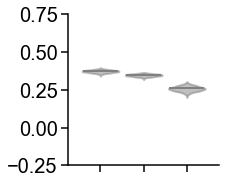

In [9]:
utilities.plot_framework_comparison(boot, obs, n_iter=n_iter, suffix="nn", metric="arche",
                                    ylim=[-0.25,0.75], yticks=[-0.25,0,0.25,0.5,0.75])